In [2]:
from __future__ import division
import numpy as np
import pandas as pd
from math import isclose
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times"
})

In [4]:
data_H = pd.read_excel('/Users/tetiana/Documents/Affinity/expdata/jlab12.xlsx')
data_H.keys()

Index(['Unnamed: 0', 'W2', 'pT', 'Q2', 'x', 'z', 'hadron', 'target'], dtype='object')

In [5]:
data_R = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/CLAS12_1400.xlsx')
data_R.keys()

Index(['Unnamed: 0', 'x', 'z', 'Q2', 'pT', 'target', 'hadron'], dtype='object')

In [6]:
print('Max values:')
print('Harut:', 'x =', data_H['x'].max(), 'z =', data_H['z'].max(), '               pT =', data_H['pT'].max(), 'Q2 =', data_H['Q2'].max())
print('Rowan:', 'x =', data_R['x'].max(), ' z =', data_R['z'].max(), ' pT =', data_R['pT'].max(), ' Q2 =', data_R['Q2'].max())

Max values:
Harut: x = 0.5455594781168515 z = 0.9                pT = 2.209965757223014 Q2 = 11.10415605935804
Rowan: x = 0.668303247393284  z = 0.817314123633368  pT = 1.20437900739977  Q2 = 9.05949857031466


In [36]:
for i in range(len(data_H)):
    if (isclose(data_H['pT'][i], data_R['pT'][i], rel_tol=1e-1, abs_tol=0.0)):
#         if (isclose(data_H['z'][i], data_R['z'][i], rel_tol=1e-1, abs_tol=0.0)):
            if (isclose(data_H['x'][i], data_R['x'][i], rel_tol=1e-1, abs_tol=0.0)):
                if (isclose(data_H['Q2'][i], data_R['Q2'][i], rel_tol=1e-1, abs_tol=0.0)):
                    print("Kinematics same, i = ",i)
                    print('Harut data: ', 'x =', data_H['x'][i], 'z =', data_H['z'][i], 'pT =', data_H['pT'][i], 'Q2 =', data_H['Q2'][i] )
                    print('Rowan data: ', 'x =', data_R['x'][i], ' z =', data_R['z'][i], ' pT =', data_R['pT'][i], ' Q2 =', data_R['Q2'][i])
                    kinem_H = pd.DataFrame({'x': data_H['x'][i], 'z': data_H['z'][i], 'pT': data_H['pT'][i], 
                                            'Q2': data_H['Q2'][i], 'hadron': data_H['hadron'][i], 
                                            'target': data_H['target'][i]}, index = [1])
                    kinem_R = pd.DataFrame({'x': data_R['x'][i], 'z': data_R['z'][i], 'pT': data_R['pT'][i], 
                                            'Q2': data_R['Q2'][i], 'hadron': data_R['hadron'][i],
                                            'target': data_R['target'][i]}, index = [1])
    else: 
        if (i==len(data_H)-1): print('No same kinematics')
            


Kinematics same, i =  1235
Harut data:  x = 0.5455594781168515 z = 0.3666666666666667 pT = 0.4039215270835256 Q2 = 7.8728228129305
Rowan data:  x = 0.530333702183875  z = 0.245900011054363  pT = 0.393171771946087  Q2 = 7.95296439943337
No same kinematics


In [35]:
kinem_H.to_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/Harut_similar_bin.xlsx')
kinem_R.to_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/Rowan_similar_bin.xlsx')

In [46]:
for i in range(len(data_H)):
    if (isclose(data_H['x'][i], data_R['x'][i], rel_tol=1e-1, abs_tol=0.0) and isclose(data_H['z'][i], data_R['z'][i], rel_tol=1e-1, abs_tol=0.0)
       and isclose(data_H['pT'][i], data_R['pT'][i], rel_tol=1e-0, abs_tol=0.0) and isclose(data_H['Q2'][i], data_R['Q2'][i], rel_tol=1e-1, abs_tol=0.0)):
        print("Kinematics same, i = ",i)
        print('\nx =', data_H['x'][i], 'z =', data_H['z'][i], 'pT =', data_H['pT'][i], 'Q2 =', data_H['Q2'][i])
        print('\nx =', data_R['x'][i], 'z =', data_R['z'][i], 'pT =', data_R['pT'][i], 'Q2 =', data_R['Q2'][i])
        kinematics['x'][i] = data_H['x'][i]
        kinematics['z'][i] = data_H['z'][i]
        kinematics['pT'][i] = data_H['pT'][i]
        kinematics['Q2'][i] = data_H['Q2'][i]
    else: 
        if (i==len(data_H)-1): print('No same kinematics')

Kinematics same, i =  1157

x = 0.5455594781168515 z = 0.5444444444444445 pT = 0.633653802892243 Q2 = 5.581814476712445

x = 0.559688657300636 z = 0.541580636915805 pT = 0.288938350735773 Q2 = 5.03015182802216
No same kinematics


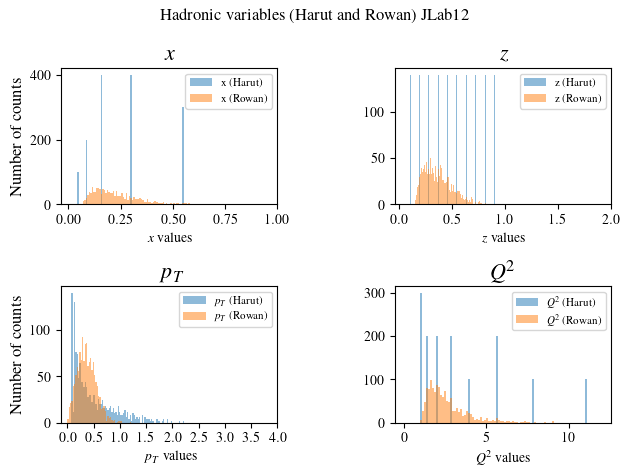

In [78]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('Hadronic variables (Harut and Rowan) JLab12')

edges1 = np.linspace(0, 0.7, 100)

axs[0, 0].hist(data_H['x'], alpha = 0.5, bins = edges1, label='x (Harut)', linewidth=2, histtype='stepfilled', density=False)
axs[0, 0].hist(data_R['x'], alpha = 0.5, bins = edges1, label=['x (Rowan)'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 0].set_title("$x$", fontsize=16)
axs[0, 0].set_xlabel('$x$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].set_xticks(np.arange(0, 1.1, step=0.25))
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 0.9, 100)

axs[0, 1].hist(data_H['z'], alpha = 0.5, bins = edges3, label='z (Harut)', linewidth=2, histtype='stepfilled', density=False)
axs[0, 1].hist(data_R['z'], alpha = 0.5, bins = edges3, label='z (Rowan)', linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 1].set_title("$z$", fontsize=16)
axs[0, 1].set_xlabel('$z$ values')
axs[0, 1].set_xticks(np.arange(0, 2.1, step=0.5))
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 2.5, 100)

axs[1, 0].hist(data_H['pT'], alpha = 0.5, bins = edges2, label='$p_T$ (Harut)', linewidth=2, histtype='stepfilled', density=False)
axs[1, 0].hist(data_R['pT'], alpha = 0.5, bins = edges2, label='$p_T$ (Rowan)', linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 0].set_title("$p_T$", fontsize=16)
axs[1, 0].set_xlabel('$p_T$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].set_xticks(np.arange(0, 4.1, step=0.5))
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 12, 100)

axs[1, 1].hist(data_H['Q2'], alpha = 0.5, bins = edges4, label='$Q^2$ (Harut)', linewidth=2, histtype='stepfilled', density=False)
axs[1, 1].hist(data_R['Q2'], alpha = 0.5, bins = edges4, label='$Q^2$ (Rowan)', linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 1].set_title("$Q^2$", fontsize=16)
axs[1, 1].set_xlabel('$Q^2$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()